## The Iris dataset in R 

this dataset is my first attempt at programming in R. Building on my Python and SQL foundations.

In [6]:
library(ggplot2)
library(dplyr)


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin



Attaching package: 'dplyr'


The following object is masked from 'package:randomForest':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [7]:
data(iris)
head(iris)
tail(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


In [8]:
nrow(iris)

[1] 150

In [9]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Here we see some spread information for each of our columns using the summary() function from dplyr. The dplyr package is a tool for data manipulation. It’s somewhat similar to pandas from Python in that it can also allow us to filter and select from data frames very easily. From the use of summary(), we get our statistical averages for our numerical variables and counts for our categorical variables. We also see that we have 50 entries of each species

In [10]:
colSums(is.na(iris))

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
           0            0            0            0            0

# Visualizing the Data
We now know a little bit about our iris data. It’s also already in a nice data frame with comprehensible columns names, so let’s map some variables into plots!

Now we are going to start using another important library, ggplot2 to represent our data visually. Ggplot2 acts as our matplotlib from Python. The “gg” stands for grammar of graphics which makes sense because ggplot2 is all about creating charts, plots, and other variable defined visuals.

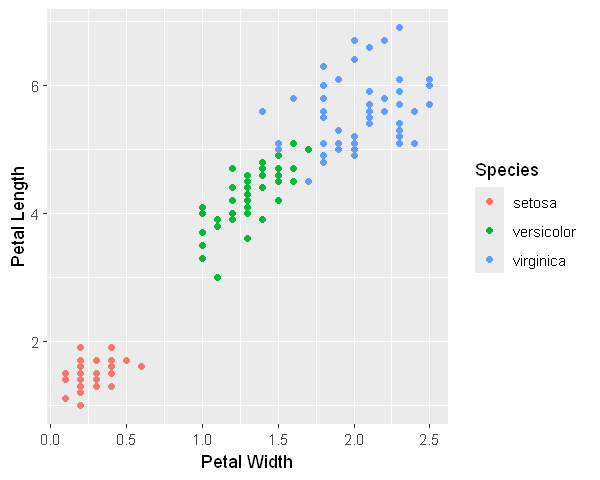

In [11]:
options(repr.plot.width = 5, repr.plot.height = 4)
iris_plot <-ggplot(iris,aes(y=Petal.Length,x=Petal.Width,col=Species))+geom_point()+xlab("Petal Width")+ylab("Petal Length")
iris_plot

With this first plot, I placed petal width on the x and sepal length on the y and colored by species. Notice how distinctively the species group for these values!

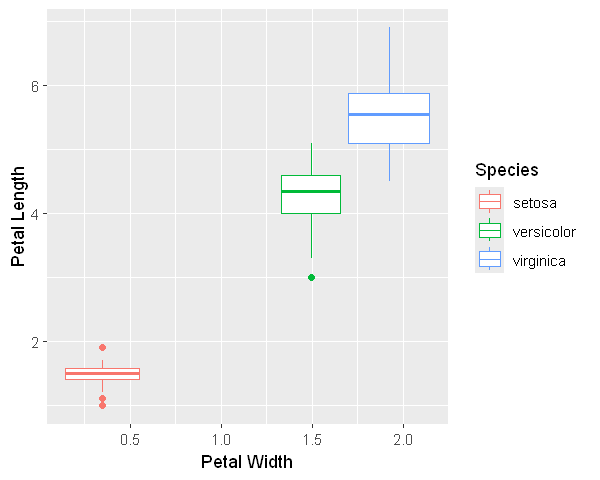

In [12]:
options(repr.plot.width = 5, repr.plot.height = 4)
iris_box <- ggplot(iris,aes(y=Petal.Length,x=Petal.Width,col=Species))+geom_boxplot()+xlab("Petal Width")+ylab("Petal Length")
iris_box

Here I’ve taken the same petal values for x and y as in the first plot and created box plots showing the spread and outliers by species. We can tell so far that setosa is obviously the smallest for petal sizes while virginica gives us the largest.

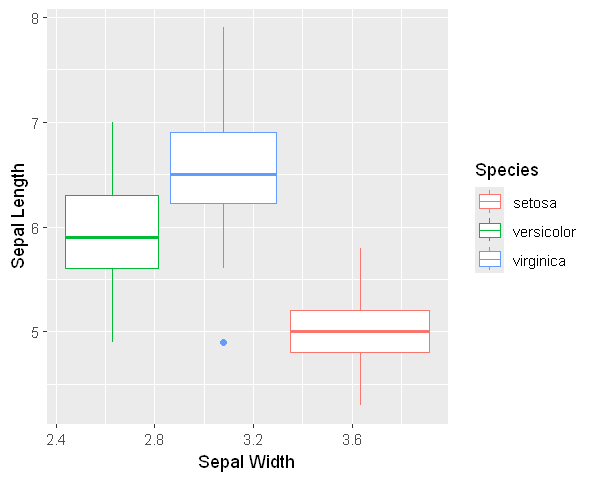

In [13]:
options(repr.plot.width = 5, repr.plot.height = 4)
iris_box2 <- ggplot(iris,aes(y=Sepal.Length,x=Sepal.Width,col=Species))+geom_boxplot()+xlab("Sepal Width")+ylab("Sepal Length")
iris_box2

Here we have a similar box plot as before, except now we have sepal width versus sepal length. Notice how the sizing order has been somewhat flipped; setosa has the widest sepal on average. Virginica has the longest sepal length and a slighter greater width than veriscolor, but these two species are much closer in value and with greater spread than setosa.

To see this visualized in a different format, I’m going to plot these same sepal x and y values into a scatter plot like we did with petal values.

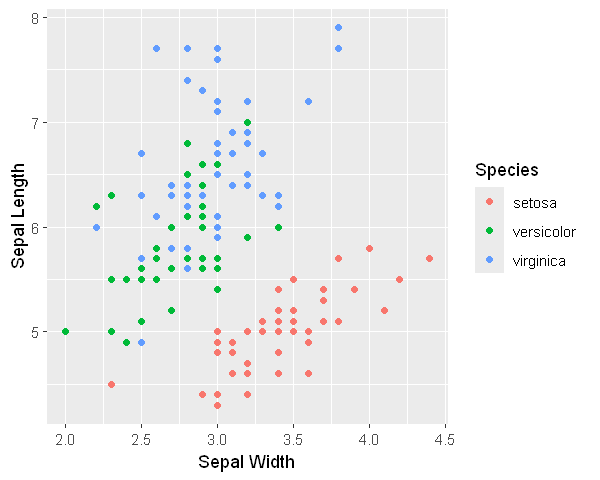

In [14]:
options(repr.plot.width = 5, repr.plot.height = 4)
iris_plot2 <-ggplot(iris,aes(y=Sepal.Length,x=Sepal.Width,col=Species))+geom_point()+xlab("Sepal Width")+ylab("Sepal Length")
iris_plot2

From this plot we see that unlike with petal dimensions, the species start to get much more muddled when viewing sepal dimensions, especially with virginica and setosa.

To further illustrate how the iris species overlap, I’m going to create two density plots, one for petal length and one for sepal length.

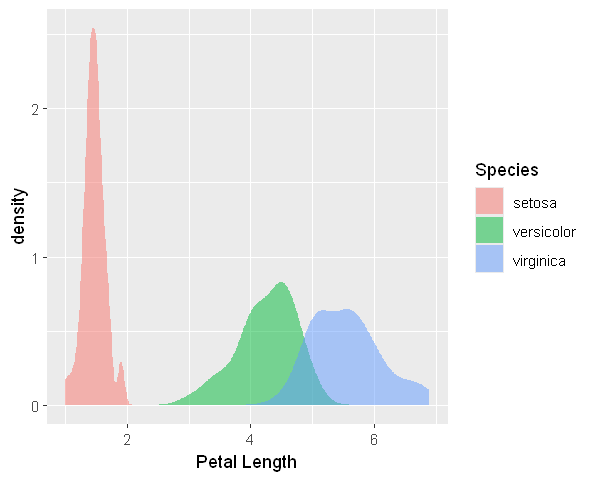

In [15]:
iris_den1 <-ggplot(iris,aes(Petal.Length, fill=Species))+geom_density(linetype=0, alpha=.5)+xlab("Petal Length")
iris_den1

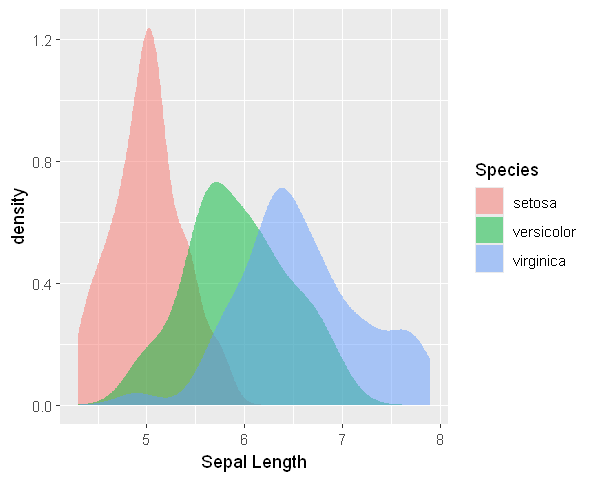

In [16]:
iris_den2 <- ggplot(iris,aes(Sepal.Length, fill=Species))+geom_density(linetype=0, alpha=.5)+xlab("Sepal Length")
iris_den2

With these two plots, we are seeing the distribution using geom_density() which acts like a histogram expect it computes a smoothed estimated curve instead of bins. Like we saw in the scatter plots, virginica and versicolor most frequently overlap while setosa tends to be more segregated. With sepal length in particular, all three species are much harder to distinguish.

Machine Learning
So far, we’ve loaded in our data, looked at it’s structure as a data frame with some dplyr, and now compared the iris species visually with ggplot2 charts. We’ve seen there is some natural clustering within certain iris measurements and certain species, but this is not universally true across the entire data set of variables. If we want to predict iris species with the greatest accuracy, we would likely want to factor in all our variables. This isn’t something that could easily be done manually or with the help of two dimensional plots, so instead we look to more advanced machine learning algorithms to do the work for us.

Now we are moving on into using the caret package. The caret package has hundreds of machine learning algorithms plus the tools to tune and compare the machine learning models. As I mentioned before, I will use this package in the same I would use sci-kit learn in Python. We know that for our iris data we are hoping to predict the species, which is categorical variable, so our models should fall under the category of classification models. But before we try using any specific model, we need to partition are data for model training.

In [17]:
library(caret)

Loading required package: lattice



Splitting the Data

In [18]:
index<- createDataPartition(iris$Species, p=0.70, list=FALSE)

With the createDataPartition() function, we are splitting our data by a desired percent overall, which I have chosen to be 70%, and defining which column we want to maintain the same proportions of data within each split, which in this case is Species. We have equal parts of each iris species in the overall data, so we want to preserve that in order to have the most accurately predicting model.

In [19]:
testset <- iris[-index,]
trainset <- iris[index,]

The createDataPartition() function returns a matrix that we can then use to index the overall iris data. Here I’m renaming these splits into test and train sets. Splitting and training a model with a select portion of the data is necessary for machine learning in order to compare how the model predicts data it has not seen before. Otherwise, the model could predict the given data set well, but it could perform horribly when predicting new data in another context, otherwise known as “overfitting”.

# Fitting and Predicting the First Model
For our first model, I’ve decide to try using a random forest model. Random Forest is a type of classification that starts with a decision tree that makes branches by choosing between variable values. The branches eventually narrow to a particular predicted class for the data points. With a random forest model, many decision trees are made, then the predictions from all the trees are aggregated to create a final class prediction.

In [20]:
library(randomForest)


In [21]:
set.seed(123)
rf_1<- train(Species~.,data=trainset,method ="rf")
rf_1

Random Forest 

105 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 105, 105, 105, 105, 105, 105, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9537991  0.9294954
  3     0.9536825  0.9292824
  4     0.9526014  0.9276453

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

First, we set a seed to control the randomization in our fitting, so we can rerun this function and get the same output. Here I am using train() to predict Species using all other variables from the trainset data and establishing the method to be a random forest model with “rf”. We could modify the parameters, but first let’s see how it does with the default.

If we call rf_1, we can see the resampling info, the sample sizes, and the accuracy results for varying levels of mtry. The mtry represents how many variables the random forest model will split on, or how many “tree nodes” are on the decision tree. The final mtry for this model is 3 since it had the highest accuracy score. We’re past 90%, so so far the accuracy and Kappa are looking pretty good for this model.

In [25]:
pred_1<- predict(rf_1,testset)

Now to see how the model does on new data, I am creating predictions with our trained model on the testset data. Then, I’m going to compare the predictions to the actual values with a confusion matrix

In [26]:
confusionMatrix(pred_1, testset$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         2
  virginica       0          1        13

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9            
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           0.8667
Specificity                 1.0000            0.9333           0.9667
Pos Pred Value              1.0000            0.8750           0.9286
Neg Pred Value              1.0000            0.9655           0.9355
Prevalence

With the confusion matrix, we can see what species was predicted for each entry and what species the entries actually were. We do see that we misclassified versicolor and virginica. This isn’t surprising since we saw earlier how close versicolor and virginica aligned in size. Our accuracy for these predictions was also very high. We could call it and say we are happy with this model, but let’s see how other model algorithms would fair with this data.

With caretList(), we can specify a number of models and run them on the data all at once! But we also need to install caretEnsemble to use it.

In [27]:
install.packages("caretEnsemble", repos='http://cran.rstudio.com/')

Installing package into 'C:/Users/keith/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'patchwork', 'pbapply'




package 'patchwork' successfully unpacked and MD5 sums checked
package 'pbapply' successfully unpacked and MD5 sums checked
package 'caretEnsemble' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\keith\AppData\Local\Temp\RtmpMr8946\downloaded_packages


In [28]:
library(caretEnsemble)

With caretEnsemble loaded, I’m going to try three more models: “rpart” recursive partitioning with regression trees, “knn” k-nearest neighbors, and a “svmPoly” support vector model with polynomial kernel. All three of these are types of classification algorithms. Rpart is a recursive decision tree model but with only one tree, unlike random forest. KNN is a means of predicting a data point’s class type with a formula to determine the class of the next closest data point. And finally, support vector models classify by attempting to partition data into hyper-planes by class, in this case with a polynomial kernel.

In [31]:
algorithmList<-c('rpart','knn','svmPoly')

In [35]:
set.seed(123)
models <- caretList(Species~.,data=trainset,methodList=algorithmList)

In [34]:
set.seed(123)
results <- resamples(models)
summary(results)


Call:
summary.resamples(object = results)

Models: rpart, knn, svmPoly 
Number of resamples: 5 

Accuracy 
             Min.   1st Qu.    Median      Mean  3rd Qu. Max. NA's
rpart   0.8095238 0.9047619 0.9047619 0.9142857 0.952381    1    0
knn     0.9047619 0.9523810 1.0000000 0.9714286 1.000000    1    0
svmPoly 0.9523810 1.0000000 1.0000000 0.9904762 1.000000    1    0

Kappa 
             Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
rpart   0.7142857 0.8571429 0.8571429 0.8714286 0.9285714    1    0
knn     0.8571429 0.9285714 1.0000000 0.9571429 1.0000000    1    0
svmPoly 0.9285714 1.0000000 1.0000000 0.9857143 1.0000000    1    0


Let’s view the results in a simple box plot.

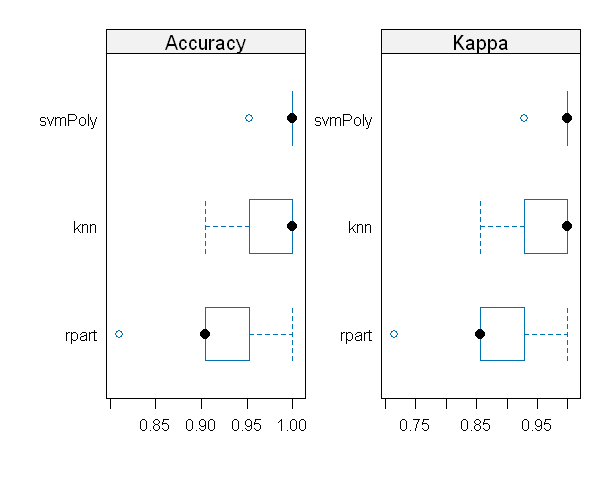

In [37]:
scales <- list(x=list(relation="free"),y=list(relation="free"))
bwplot(results, scales=scales)

And now we see how the spreads of the scores compare visually! All four of the different models performed quite well lucky for us. From here, we could try fine tuning one of these models, but we might not get higher results. There is even a chance different parameters could weaken the models! However, for the sake of classifying flower species, I think we’ve certainly done the job with enough accuracy.